In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [3]:
plt.style.use("ggplot")

In [32]:
df = pd.read_csv('housing.csv')

In [33]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [34]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


(20640, 10)

In [35]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

## Observation - 
1) In total_bedrooms, total_rooms, population, households, median_house_value the distribution is positively skewed(right-skewed).
2) In longitude, latitude, housing_median_age the distribution is normal or gaussian.

In [36]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

There is only one feature with missing values that is total_bedrooms.

In [37]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [38]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

## Data Cleaning

1) Handling Missing Values 
2) Handling Outliers

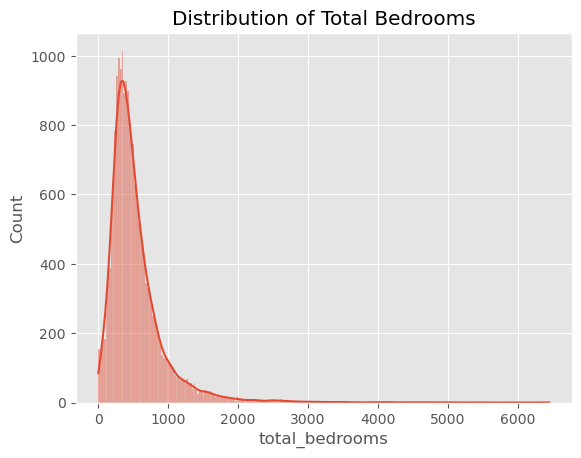

In [39]:
sns.histplot(df['total_bedrooms'],kde=True)
plt.title("Distribution of Total Bedrooms")
plt.show()

The data is heavily right skewed

In [40]:
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [41]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Successfully handled the missing values

# Handling outliers

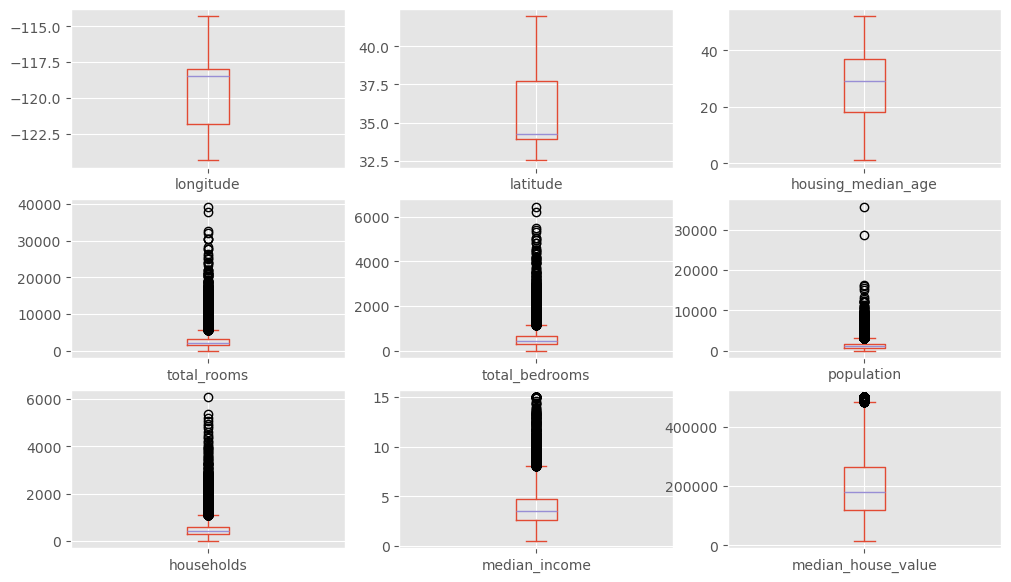

In [42]:
df.plot(kind= 'box', subplots = True, layout = (3,3), figsize = (12,7))
plt.show()

## Observation - 
Significant number of outliers are present in total_rooms, total_bedrooms, population, households, median_income and median_house_value.

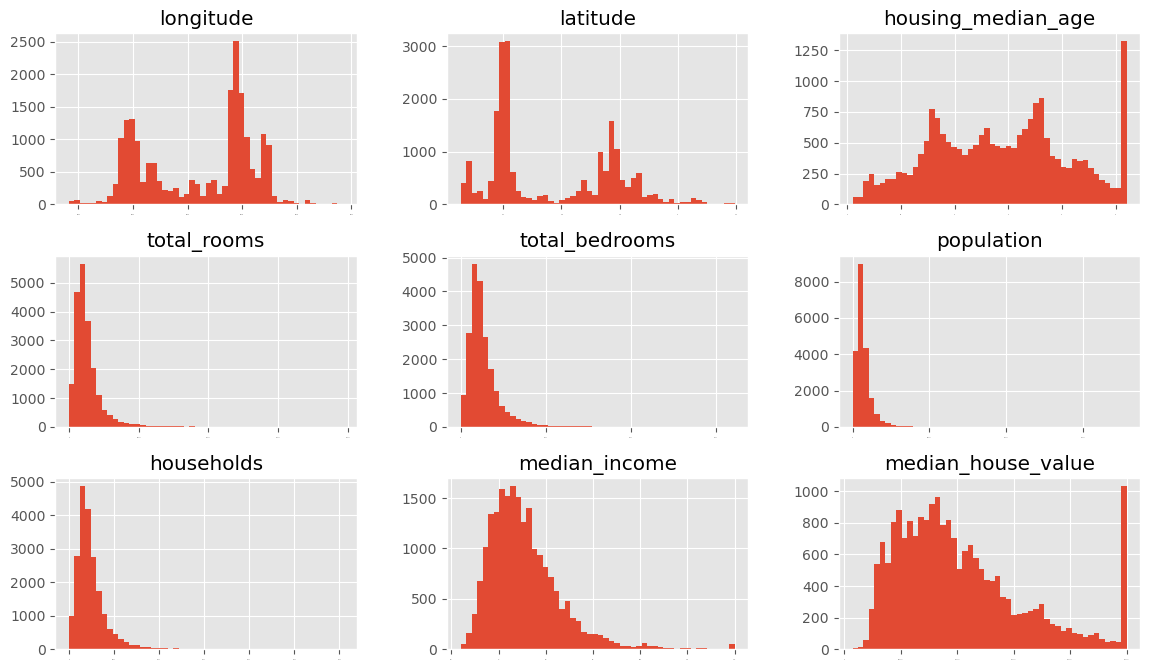

In [43]:
df.hist(bins=50, xlabelsize= 0.5, figsize = (14,8))
plt.show()

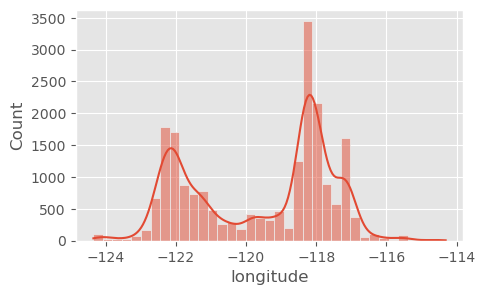

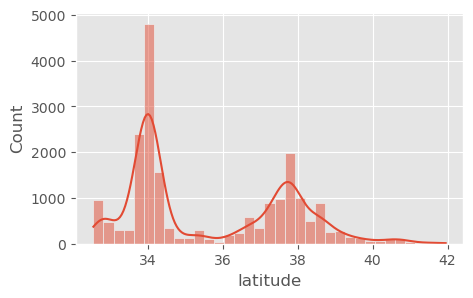

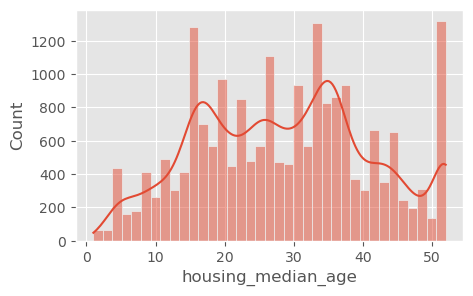

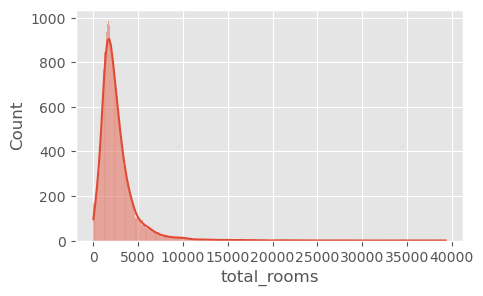

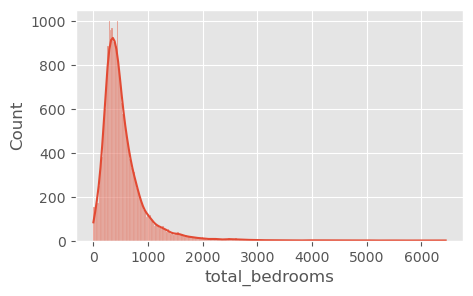

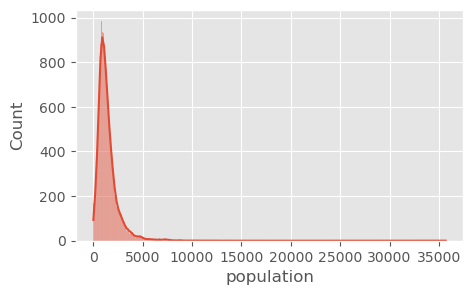

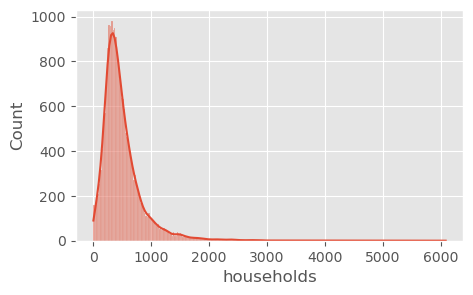

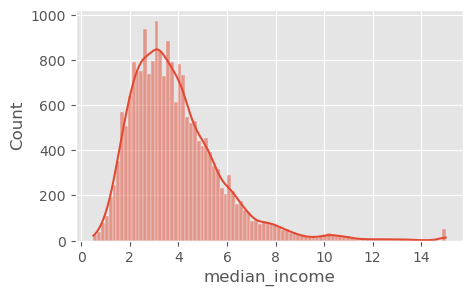

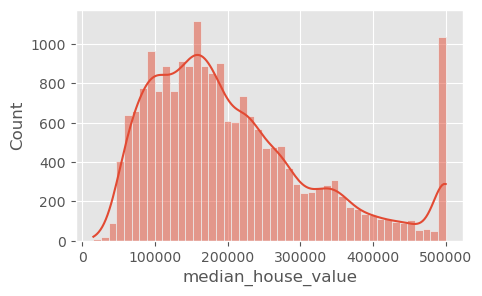

In [44]:
clmn = df.select_dtypes(include='number').columns
for column in clmn:
    plt.figure(figsize=(5, 3))
    sns.histplot(data = df[column], multiple='layer', kde= True)
    plt.show()

In [45]:
## log transformation

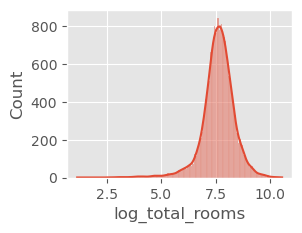

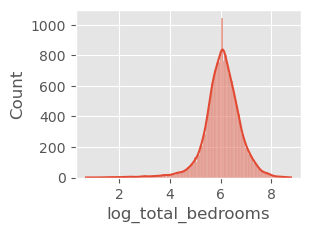

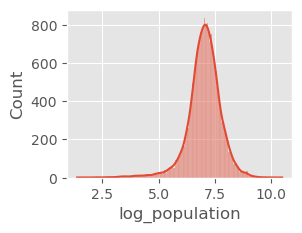

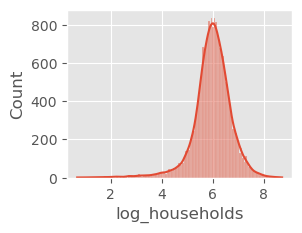

In [46]:
df['log_total_rooms'] = np.log1p(df['total_rooms'])
df['log_total_bedrooms'] = np.log1p(df['total_bedrooms'])
df['log_population'] = np.log1p(df['population'])
df['log_households'] = np.log1p(df['households'])
columns = ['log_total_rooms','log_total_bedrooms','log_population','log_households']
i=1
for clmn in columns:
    plt.subplot(2, 2, i) 
    sns.histplot(df[clmn],kde=True)
    plt.show()
    i=i+1

## Exploratory Data Analysis

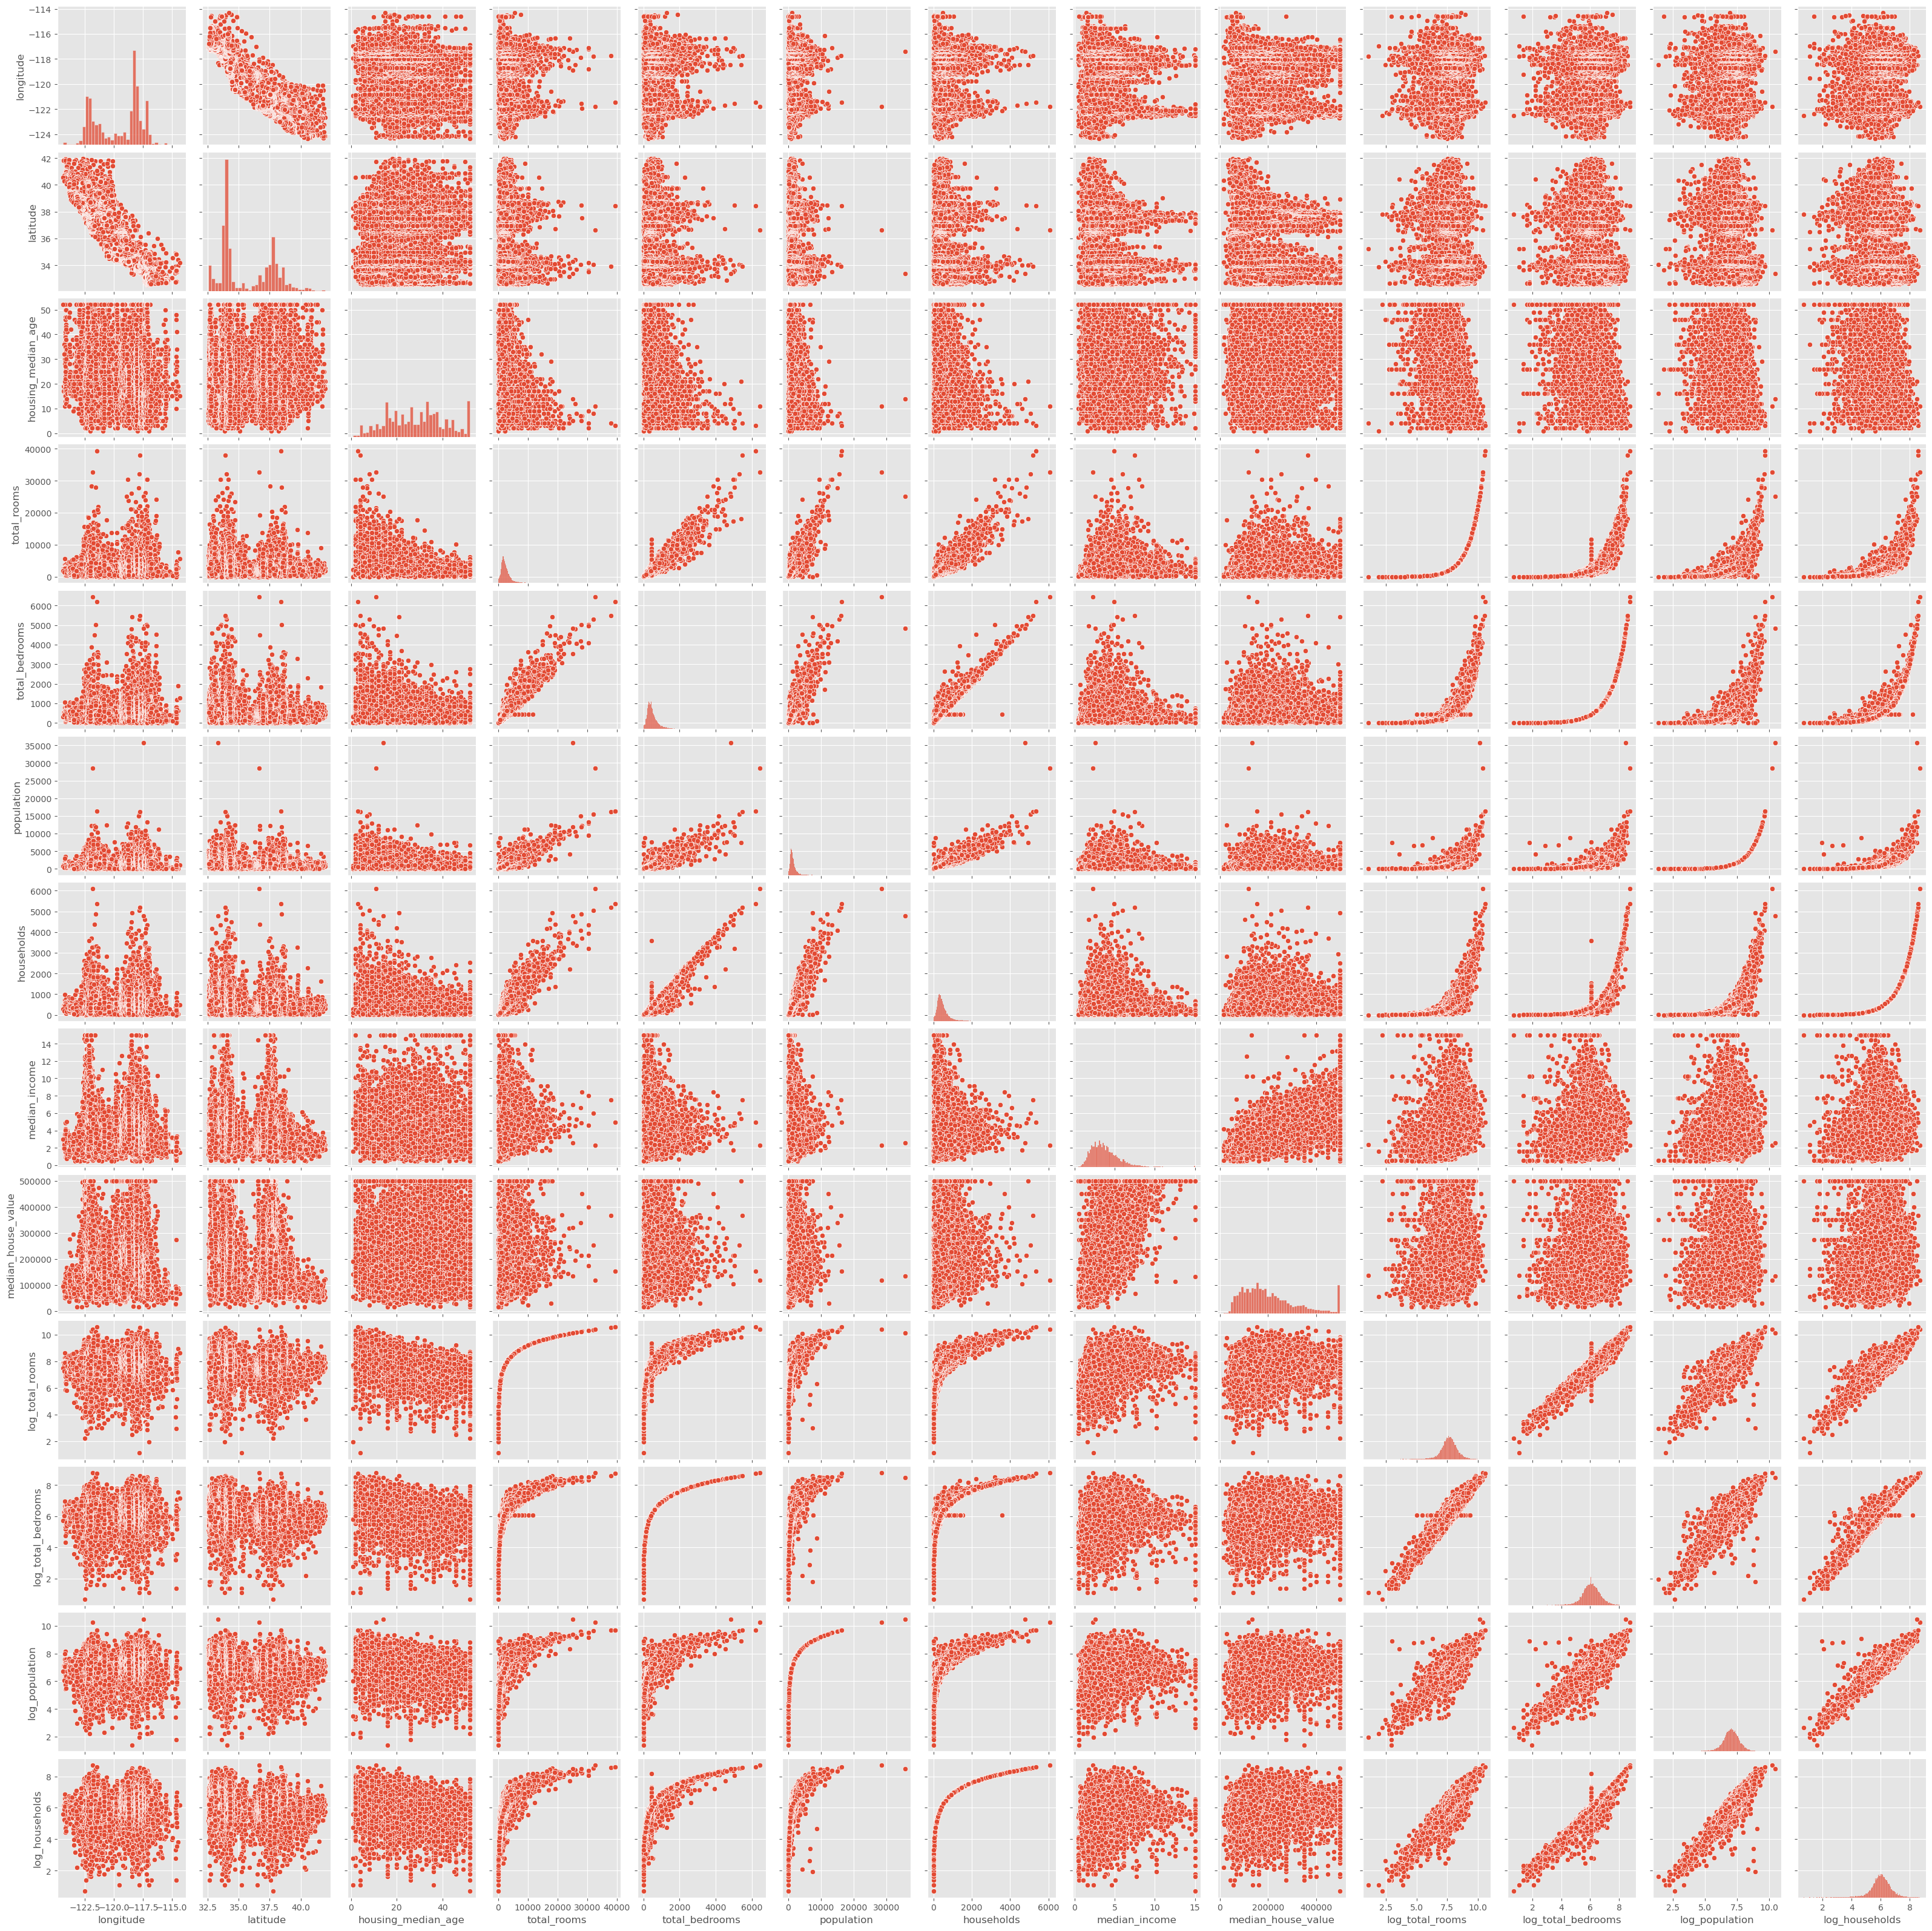

In [47]:
sns.pairplot(df)
plt.show()

In [48]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   log_total_rooms  log_total_bedrooms  log_population  log_households  
0         6.781058            4.867534        5.777652        4.844187  
1         8.867850            7.009409        7.784057        7.037906  
2         7.291656            5.252273        6.208590        5.181784  
3         7.150701            5.463832        6.326149        5.393628  
4         7.395108            5.638355        6.338594        5.560682

In [49]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 13 numerical features : ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'log_total_rooms', 'log_total_bedrooms', 'log_population', 'log_households']

We have 1 categorical features : ['ocean_proximity']


In [51]:
df.duplicated().value_counts()

False    20640
Name: count, dtype: int64

## Univariate Analysis of Numerical Features

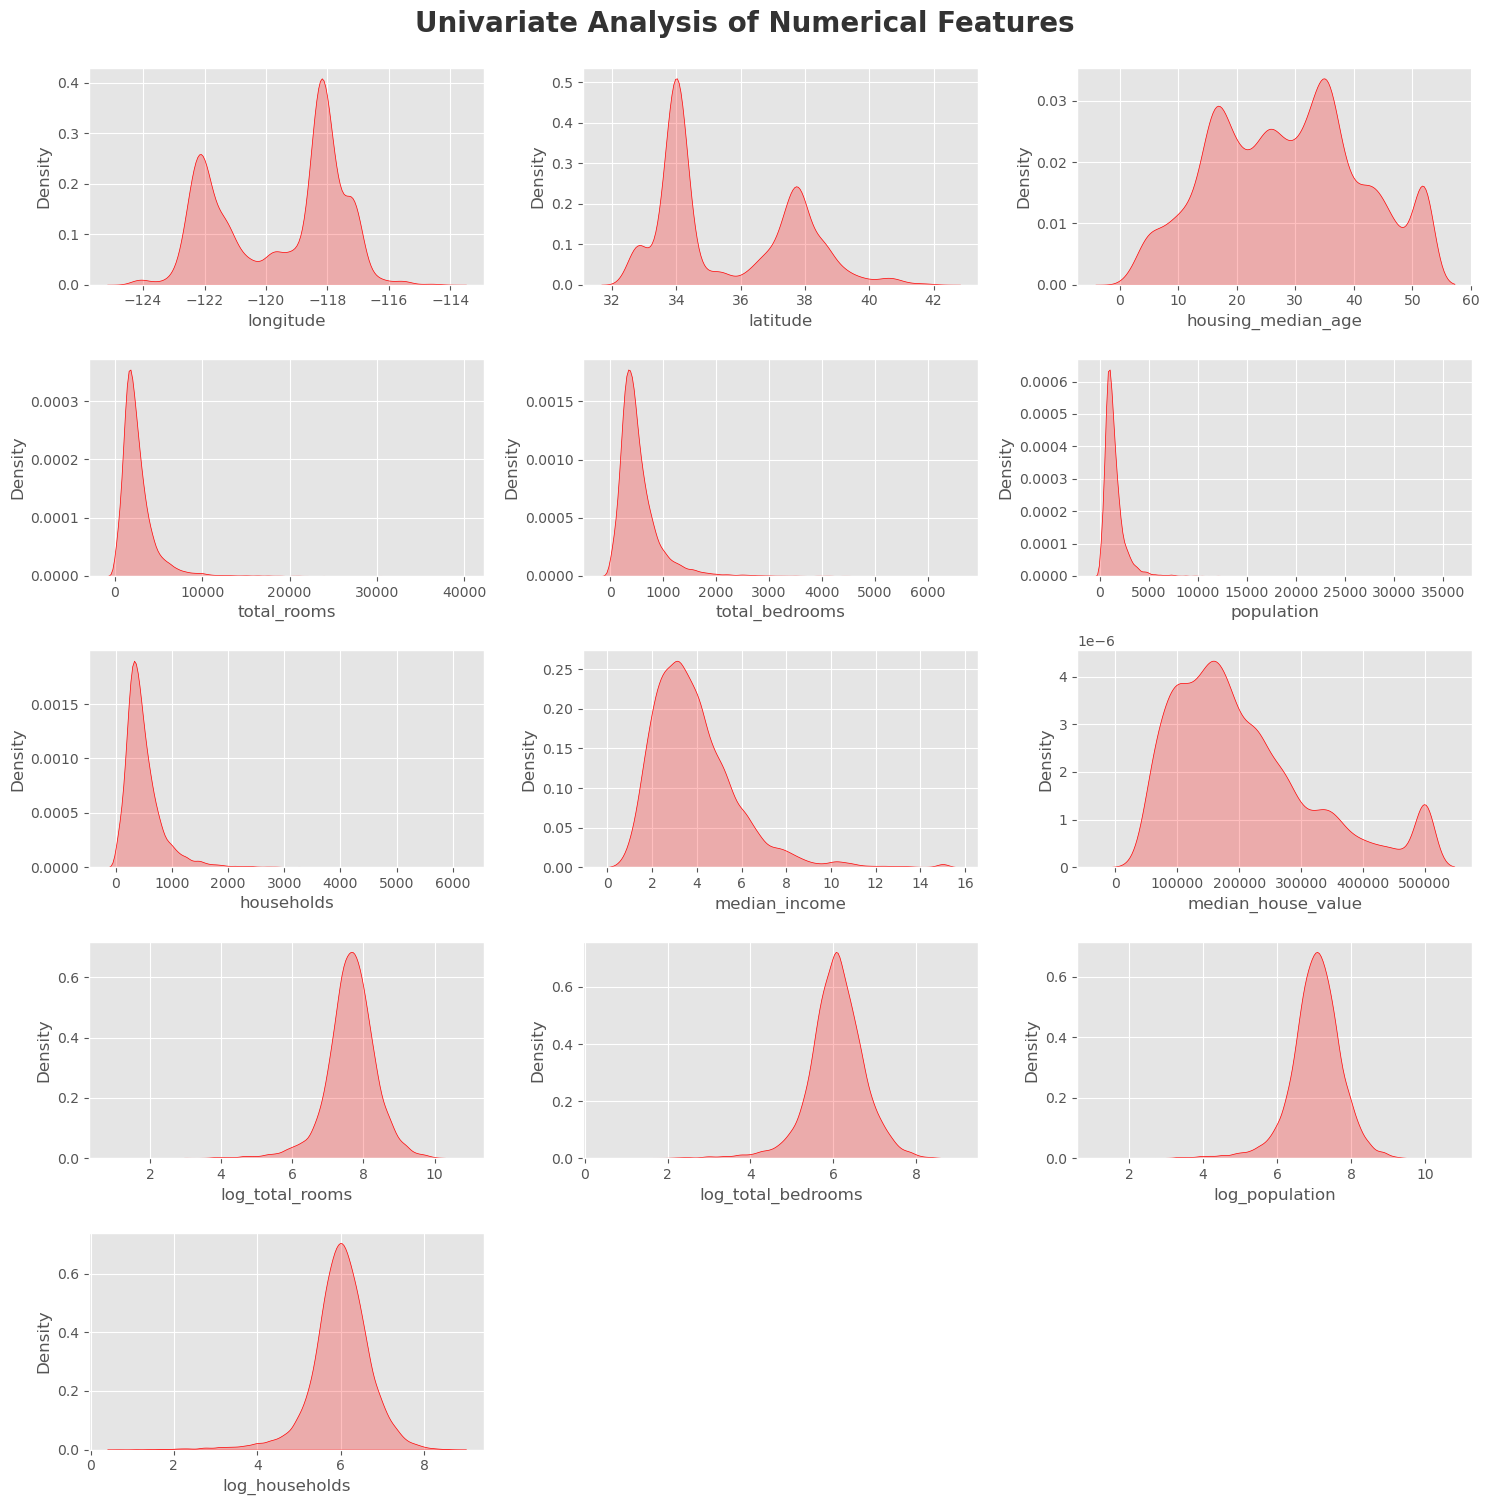

In [100]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],fill=True, color='r')
    plt.xlabel(numeric_features[i])
plt.tight_layout()
plt.show()

Bivariate Plot

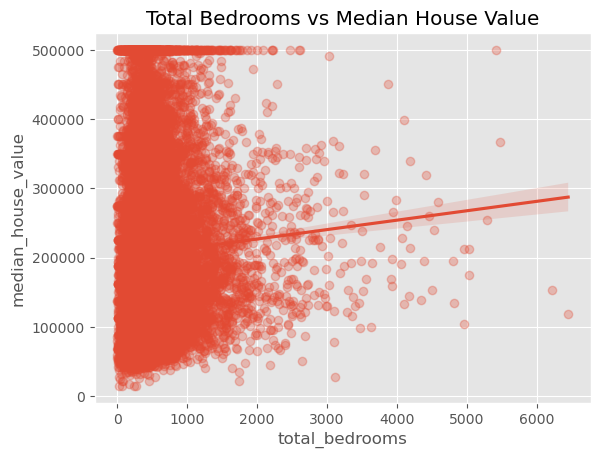

In [83]:
sns.regplot(x='total_bedrooms', y='median_house_value', data=df, scatter_kws={'alpha':0.3})
plt.title("Total Bedrooms vs Median House Value")
plt.show()

As the number of bedrooms increases, median house value very slightly increases.

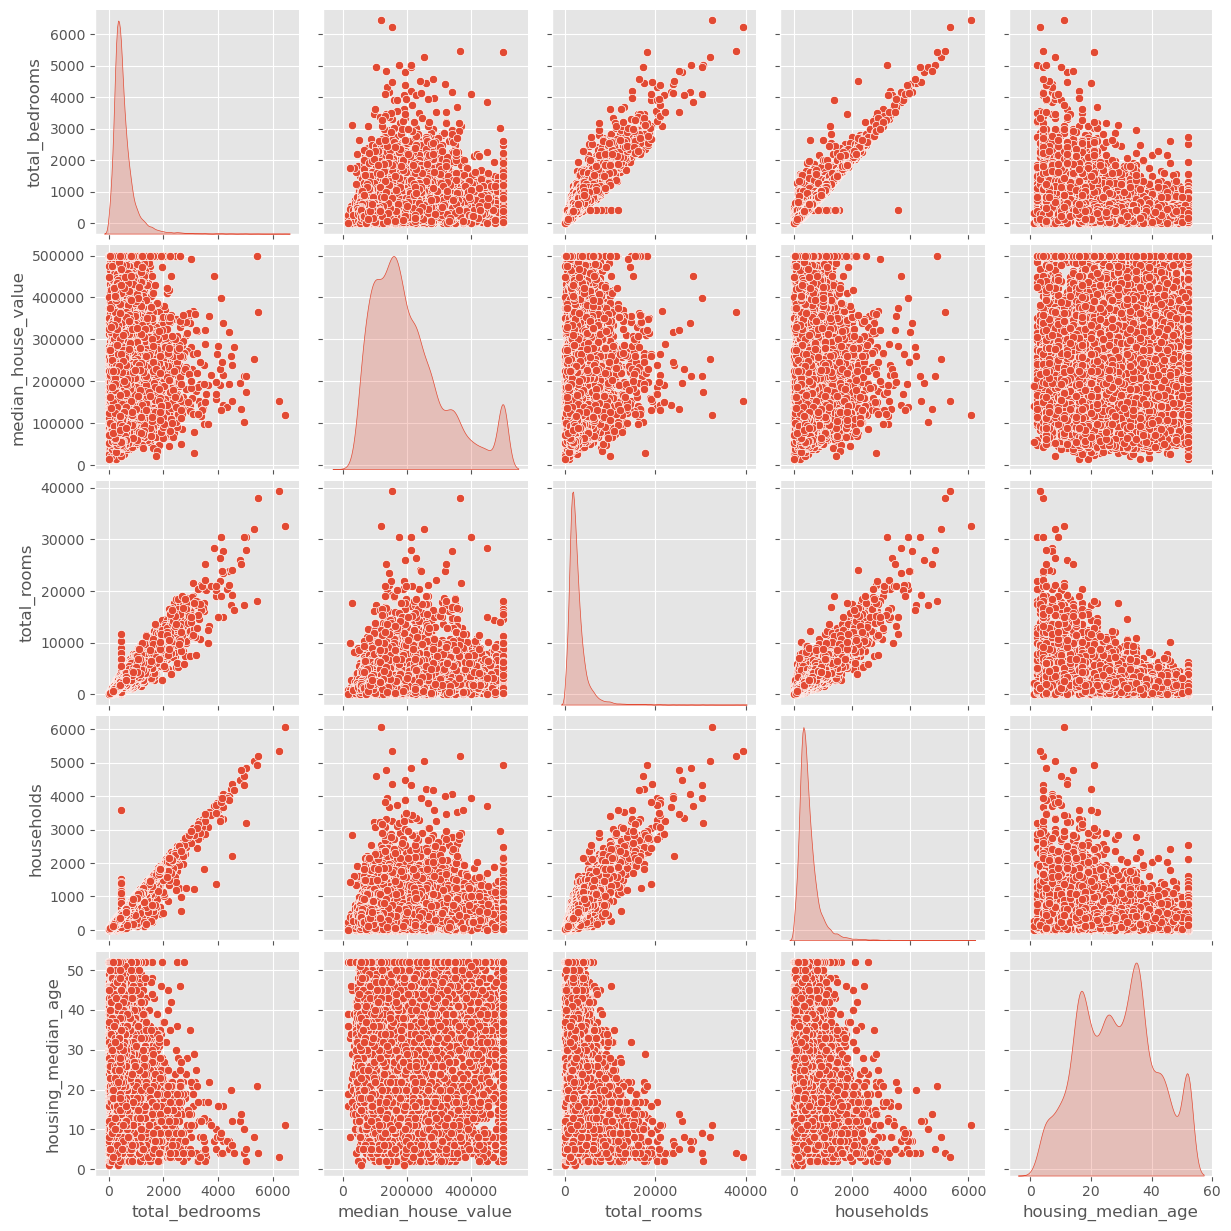

In [84]:
sns.pairplot(df[["total_bedrooms", "median_house_value", "total_rooms", "households","housing_median_age"]], diag_kind="kde")
plt.show()

## Feature Engineering

In [85]:
encoded = OneHotEncoder()
encoded_ocean_proximity = encoded.fit_transform(df[['ocean_proximity']]).toarray()
encoded_ocean_proximity

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [86]:
encoded_ocean_proximity = pd.DataFrame(encoded_ocean_proximity,columns=encoded.get_feature_names_out())
encoded_ocean_proximity

ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     0.0   
1                            0.0                     0.0   
2                            0.0                     0.0   
3                            0.0                     0.0   
4                            0.0                     0.0   
...                          ...                     ...   
20635                        0.0                     1.0   
20636                        0.0                     1.0   
20637                        0.0                     1.0   
20638                        0.0                     1.0   
20639                        0.0                     1.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       1.0   
1                         0.0                       1.0   
2                         0.0                       1.0   
3                         0.0                       1.0   
4                         0.0                       1.0   
...                       ...                       ...   
20635                     0.0                       0.0   
20636                     0.0                       0.0   
20637                     0.0                       0.0   
20638                     0.0                       0.0   
20639                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
20635                         0.0  
20636                         0.0  
20637                         0.0  
20638                         0.0  
20639                         0.0  

[20640 rows x 5 columns]

In [87]:
df = pd.concat([df,encoded_ocean_proximity], axis=1)

In [88]:
df.drop('ocean_proximity',axis=1,inplace=True)

In [89]:
df.corr()

longitude  latitude  housing_median_age  \
longitude                    1.000000 -0.924664           -0.108197   
latitude                    -0.924664  1.000000            0.011173   
housing_median_age          -0.108197  0.011173            1.000000   
total_rooms                  0.044568 -0.036100           -0.361262   
total_bedrooms               0.069120 -0.066484           -0.319026   
population                   0.099773 -0.108785           -0.296244   
households                   0.055310 -0.071035           -0.302916   
median_income               -0.015176 -0.079809           -0.119034   
median_house_value          -0.045967 -0.144160            0.105623   
log_total_rooms              0.029337 -0.032319           -0.315216   
log_total_bedrooms           0.060528 -0.067937           -0.270861   
log_population               0.109029 -0.136460           -0.244264   
log_households               0.055261 -0.087937           -0.242896   
ocean_proximity_<1H OCEAN    0.321121 -0.446969            0.045300   
ocean_proximity_INLAND      -0.055575  0.351166           -0.236645   
ocean_proximity_ISLAND       0.009446 -0.016572            0.017020   
ocean_proximity_NEAR BAY    -0.474489  0.358771            0.255172   
ocean_proximity_NEAR OCEAN   0.045509 -0.160818            0.021622   

                            total_rooms  total_bedrooms  population  \
longitude                      0.044568        0.069120    0.099773   
latitude                      -0.036100       -0.066484   -0.108785   
housing_median_age            -0.361262       -0.319026   -0.296244   
total_rooms                    1.000000        0.927058    0.857126   
total_bedrooms                 0.927058        1.000000    0.873535   
population                     0.857126        0.873535    1.000000   
households                     0.918484        0.974366    0.907222   
median_income                  0.198050       -0.007617    0.004834   
median_house_value             0.134153        0.049457   -0.024650   
log_total_rooms                0.788958        0.756556    0.685233   
log_total_bedrooms             0.742355        0.812647    0.713274   
log_population                 0.685979        0.719425    0.795675   
log_households                 0.729190        0.783368    0.730947   
ocean_proximity_<1H OCEAN     -0.003031        0.017966    0.074613   
ocean_proximity_INLAND         0.025624       -0.006158   -0.020732   
ocean_proximity_ISLAND        -0.007572       -0.004322   -0.010412   
ocean_proximity_NEAR BAY      -0.023022       -0.019667   -0.060880   
ocean_proximity_NEAR OCEAN    -0.009175        0.000557   -0.024264   

                            households  median_income  median_house_value  \
longitude                     0.055310      -0.015176           -0.045967   
latitude                     -0.071035      -0.079809           -0.144160   
housing_median_age           -0.302916      -0.119034            0.105623   
total_rooms                   0.918484       0.198050            0.134153   
total_bedrooms                0.974366      -0.007617            0.049457   
population                    0.907222       0.004834           -0.024650   
households                    1.000000       0.013033            0.065843   
median_income                 0.013033       1.000000            0.688075   
median_house_value            0.065843       0.688075            1.000000   
log_total_rooms               0.759820       0.205928            0.159422   
log_total_bedrooms            0.800965      -0.025447            0.053059   
log_population                0.755674      -0.005046           -0.021205   
log_households                0.812701       0.003716            0.073612   
ocean_proximity_<1H OCEAN     0.042435       0.168876            0.256617   
ocean_proximity_INLAND       -0.039402      -0.237496           -0.484859   
ocean_proximity_ISLAND       -0.009077      -0.009228            0.023416   
ocean_proximity_NEA

In [90]:
df.shape

(20640, 18)

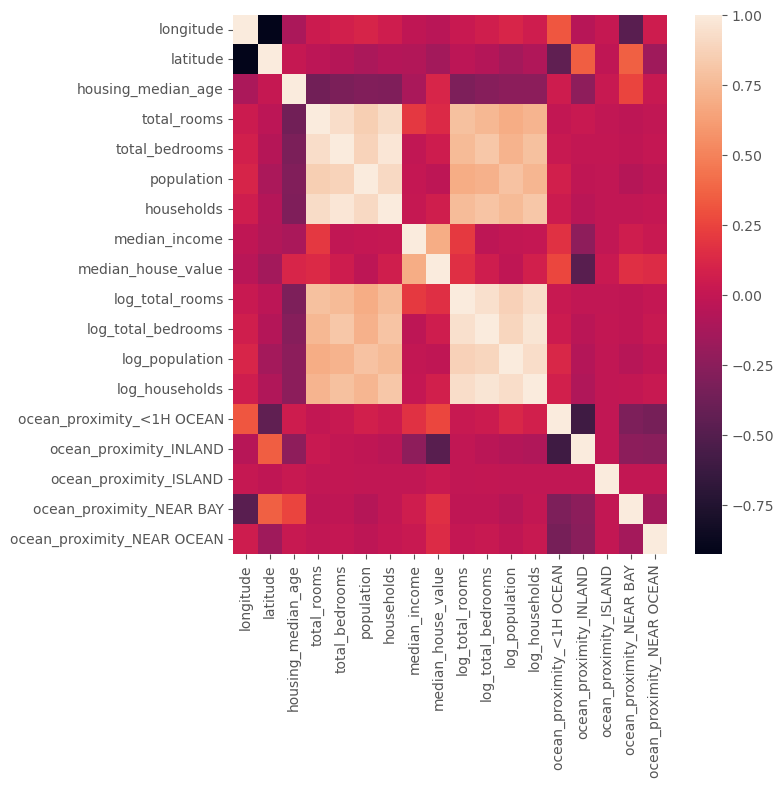

In [91]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr())
plt.show()

#Annot = True -> for correlation values